In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

import openrtdynamics2.lang as dy
from openrtdynamics2.ORTDtoNumpy import ORTDtoNumpy

# Interface between numpy and ORTD systems

This example demonstrates a 'quick' integration and execution of systems to perform computations on numpy arrays. The function decorator 'ORTDtoNumpy' converts a given function describing a system into a function that can be directly called with in- and output data. Internally, the system is automatically compiled and temporary instances are created to perform computations on the given data.

In [2]:
z_inf = 0.9

# z_inf (being a parameter to the decorator) is a constant parameter that is compiled into
@ORTDtoNumpy(z_inf=z_inf)
def low_pass( u, z_inf ):
    
    y = dy.dtf_lowpass_1_order(u, z_inf)
    
    return y

compiling system simulation (level 0)... 
determining the computation order...
building execution paths...
All dependencies are resolved.


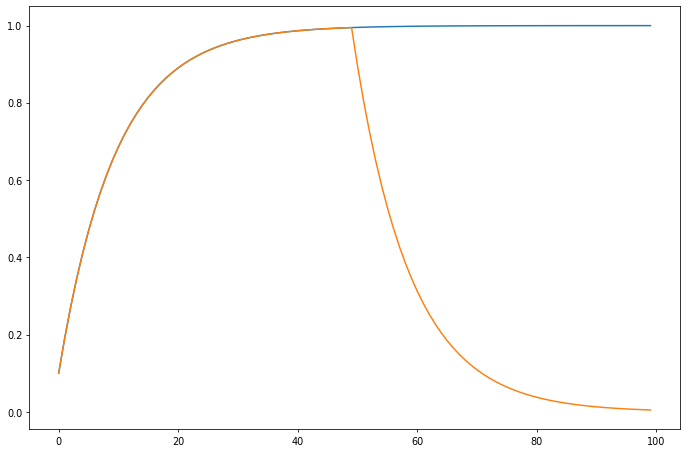

In [3]:
# please note: the parameter z_inf is fixed
y1 = low_pass( np.ones(100) )
y2 = low_pass( np.concatenate( (np.ones(50), np.zeros(50)) )  )

plt.figure(figsize=(12,8), dpi=70)
plt.plot(y1)
plt.plot(y2)
plt.show()

# 2nd example

In [4]:
@ORTDtoNumpy()
def low_pass_2( u, z_inf ):
    
    y = dy.dtf_lowpass_1_order(u, z_inf)
    
    return y

compiling system simulation (level 0)... 
determining the computation order...
building execution paths...
All dependencies are resolved.


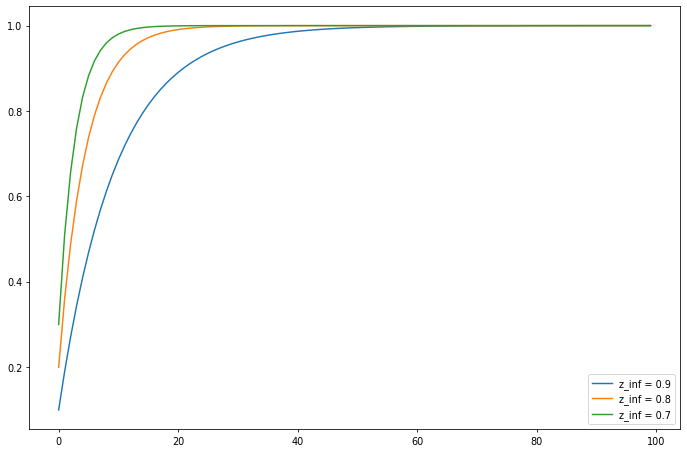

In [5]:
# please note: the parameter z_inf is *not* fixed
# in these function calls z_inf will be treated as a constant signal as a single value (instead of a np-array) is given.
y1 = low_pass_2( np.ones(100), 0.9 ) 
y2 = low_pass_2( np.ones(100), 0.8 )
y3 = low_pass_2( np.ones(100), 0.7 )

plt.figure(figsize=(12,8), dpi=70)
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.legend(['z_inf = 0.9', 'z_inf = 0.8', 'z_inf = 0.7'])
plt.show()